In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import glob
import os
from functools import reduce
from pathlib import Path

In [2]:
# current_working_dir = os.getcwd()
# print(current_working_dir)
examples_path = os.path.join(Path().resolve().parent,"data","puzzles")
examples = [ex for ex in glob.glob(f"{examples_path}/convex_hull*")]
examples[:10]

['C:\\Users\\yaniv\\Desktop\\MSCBenGurion\\iCVL\\rgons\\data\\puzzles\\convex_hull-3-int-2-2299',
 'C:\\Users\\yaniv\\Desktop\\MSCBenGurion\\iCVL\\rgons\\data\\puzzles\\convex_hull-3-int-3-6150',
 'C:\\Users\\yaniv\\Desktop\\MSCBenGurion\\iCVL\\rgons\\data\\puzzles\\convex_hull-4-int-1-1552',
 'C:\\Users\\yaniv\\Desktop\\MSCBenGurion\\iCVL\\rgons\\data\\puzzles\\convex_hull-4-int-1-1574',
 'C:\\Users\\yaniv\\Desktop\\MSCBenGurion\\iCVL\\rgons\\data\\puzzles\\convex_hull-4-int-1-4782',
 'C:\\Users\\yaniv\\Desktop\\MSCBenGurion\\iCVL\\rgons\\data\\puzzles\\convex_hull-4-int-1-6167',
 'C:\\Users\\yaniv\\Desktop\\MSCBenGurion\\iCVL\\rgons\\data\\puzzles\\convex_hull-4-int-1-8734',
 'C:\\Users\\yaniv\\Desktop\\MSCBenGurion\\iCVL\\rgons\\data\\puzzles\\convex_hull-4-int-1-973',
 'C:\\Users\\yaniv\\Desktop\\MSCBenGurion\\iCVL\\rgons\\data\\puzzles\\convex_hull-4-int-1-9961',
 'C:\\Users\\yaniv\\Desktop\\MSCBenGurion\\iCVL\\rgons\\data\\puzzles\\convex_hull-4-int-2-1805']

In [4]:
'''Sort the files by names of the number of points contained so the graph will be linear? '''
def sorting_by_num_points(example_name):
    ex = example_name.split("\\")[-1]
    values = ex.split("-")
    n_convex_hull = eval(values[1])
    n_interior_points = eval(values[-2])
    return n_convex_hull+n_interior_points + n_interior_points*0.01

examples = sorted(examples,key=sorting_by_num_points)
examples[:10]

['C:\\Users\\yaniv\\Desktop\\MSCBenGurion\\iCVL\\rgons\\data\\puzzles\\convex_hull-5-int-0-2039',
 'C:\\Users\\yaniv\\Desktop\\MSCBenGurion\\iCVL\\rgons\\data\\puzzles\\convex_hull-5-int-0-3729',
 'C:\\Users\\yaniv\\Desktop\\MSCBenGurion\\iCVL\\rgons\\data\\puzzles\\convex_hull-4-int-1-1552',
 'C:\\Users\\yaniv\\Desktop\\MSCBenGurion\\iCVL\\rgons\\data\\puzzles\\convex_hull-4-int-1-1574',
 'C:\\Users\\yaniv\\Desktop\\MSCBenGurion\\iCVL\\rgons\\data\\puzzles\\convex_hull-4-int-1-4782',
 'C:\\Users\\yaniv\\Desktop\\MSCBenGurion\\iCVL\\rgons\\data\\puzzles\\convex_hull-4-int-1-6167',
 'C:\\Users\\yaniv\\Desktop\\MSCBenGurion\\iCVL\\rgons\\data\\puzzles\\convex_hull-4-int-1-8734',
 'C:\\Users\\yaniv\\Desktop\\MSCBenGurion\\iCVL\\rgons\\data\\puzzles\\convex_hull-4-int-1-973',
 'C:\\Users\\yaniv\\Desktop\\MSCBenGurion\\iCVL\\rgons\\data\\puzzles\\convex_hull-4-int-1-9961',
 'C:\\Users\\yaniv\\Desktop\\MSCBenGurion\\iCVL\\rgons\\data\\puzzles\\convex_hull-3-int-2-2299']

In [5]:
dfs = [pd.read_csv(f"{ex}/polygon_type_hist.csv") for ex in examples]
dfs_count = []
for df in dfs:
    df.columns=["polygon_type","Count","Percentage"]
    dfs_count.append(df[["Count"]])


dfs[0].head()

,polygon_type,Count,Percentage
0,3,20,76.92
1,4,5,19.23
2,5,1,3.85


In [6]:
transposed_dfs = [df[["polygon_type","Count"]].set_index("polygon_type").T for df in dfs]
transposed_dfs[0].head()
df_all_puzzles = pd.concat(transposed_dfs).fillna(0)
df_all_puzzles.columns = [f"polygons_{poly_type}" for poly_type in df_all_puzzles.columns]
df_all_puzzles["sample_name"] = [ex.split("\\")[-1] for ex in examples]
df_all_puzzles = df_all_puzzles.reset_index(drop=True)
# df_all_puzzles = df_all_puzzles.set_index("sample_name")

# df_all_puzzles.index.name = "sample"
df_all_puzzles.head()


,polygons_3,polygons_4,polygons_5,polygons_6,sample_name
0,20,5,1.0,0.0,convex_hull-5-int-0-2039
1,20,5,1.0,0.0,convex_hull-5-int-0-3729
2,16,2,0.0,0.0,convex_hull-4-int-1-1552
3,16,2,0.0,0.0,convex_hull-4-int-1-1574
4,16,2,0.0,0.0,convex_hull-4-int-1-4782


Summing the amount of triangles,squares.... for each sample

[<AxesSubplot:xlabel='Samples', ylabel='Counts'>,
 <AxesSubplot:xlabel='Samples', ylabel='Counts'>,
 <AxesSubplot:xlabel='Samples', ylabel='Counts'>,
 <AxesSubplot:xlabel='Samples', ylabel='Counts'>]

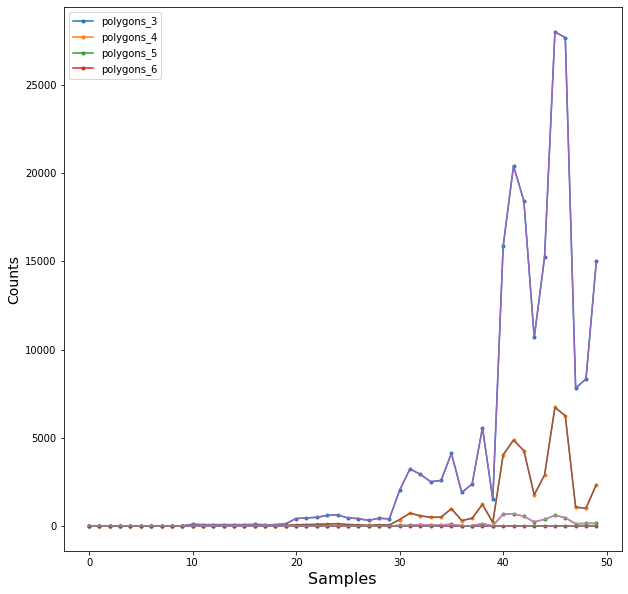

In [7]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
avg_cols = [col for col in df_all_puzzles.columns[:-1]]
[df_all_puzzles[col].plot(label=col,marker=".") for col in avg_cols]
ax.legend()
plt.xlabel("Samples",fontsize=16)
plt.ylabel("Counts",fontsize=14)
[df_all_puzzles[col].plot() for col in df_all_puzzles.columns[:-1]]

Calculate per sample across its puzzles the average polygon type (triangles,squares..) 

In [8]:
df_all_puzzles["n_puzzles"] = [len(glob.glob(f"{sample_dir}/results/*.csv")) for sample_dir in examples]
df_all_puzzles.head()

,polygons_3,polygons_4,polygons_5,polygons_6,sample_name,n_puzzles
0,20,5,1.0,0.0,convex_hull-5-int-0-2039,11
1,20,5,1.0,0.0,convex_hull-5-int-0-3729,11
2,16,2,0.0,0.0,convex_hull-4-int-1-1552,5
3,16,2,0.0,0.0,convex_hull-4-int-1-1574,5
4,16,2,0.0,0.0,convex_hull-4-int-1-4782,5


In [9]:
polygons_cols = [col for col in df_all_puzzles.columns.tolist() if "polygons_" in col]
for col in polygons_cols:
    df_all_puzzles[f"avg_{col}"] = df_all_puzzles.apply(lambda row: row[col]/row["n_puzzles"],axis=1)

df_all_puzzles.head()

,polygons_3,polygons_4,polygons_5,polygons_6,sample_name,n_puzzles,avg_polygons_3,avg_polygons_4,avg_polygons_5,avg_polygons_6
0,20,5,1.0,0.0,convex_hull-5-int-0-2039,11,1.818182,0.454545,0.090909,0.0
1,20,5,1.0,0.0,convex_hull-5-int-0-3729,11,1.818182,0.454545,0.090909,0.0
2,16,2,0.0,0.0,convex_hull-4-int-1-1552,5,3.200000,0.400000,0.000000,0.0
3,16,2,0.0,0.0,convex_hull-4-int-1-1574,5,3.200000,0.400000,0.000000,0.0
4,16,2,0.0,0.0,convex_hull-4-int-1-4782,5,3.200000,0.400000,0.000000,0.0


Text(15, 2, 'FYI : when running this experiment: each 10 samples interval is the same number of\n random points (convex+interior) and the samples are sorted by the interior points')

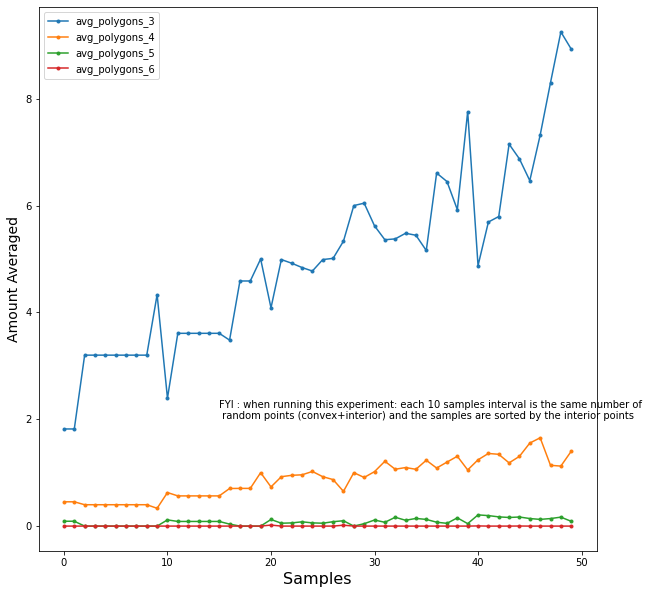

In [17]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
avg_cols = [col for col in df_all_puzzles.columns if col.startswith("avg_polygons")]
[df_all_puzzles[col].plot(label=col,marker=".") for col in avg_cols]
ax.legend()
plt.xlabel("Samples",fontsize=16)
plt.ylabel("Amount Averaged",fontsize=14)
ax.text(15,2,'''FYI : when running this experiment: each 10 samples interval is the same number of
 random points (convex+interior) and the samples are sorted by the interior points''')